# The Box-Jenkins methodology for the ARIMA model

### Box-Jenkins Methodology for Time Series Modeling and Forecasting


### Step 1: Model Identification
* **Data Analysis**: Examine the time series data for trends, seasonality, and anomalies.
* **Differencing**: Apply differencing if the series is non-stationary due to trends or seasonality.
* **Order Identification**: Use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots to determine the orders p, d, and q for the ARIMA model#.

## Step 2: Model Estimation
* **Parameter Estimation**: Use estimation methods (e.g., least squares) to estimate the parameters of the ARIMA mo#del.

## Step 3: Model Verification
* **Model Diagnostics**: Check if the residuals of the ARIMA model are white noise (i.e., no significant structure or correlation).
* **Model Adjustment**: If the model does not meet the white noise criteria, adjust the orders of the ARIMA model and repeat the previous steps.
* **Validation**: Validate the model's performance by making predictions on validation data or using evaluation metrics such as RMSE (Root Mean Square Error) or AIC (Akaike Information Cr iterion).

## Note
The Box-Jenkins methodology is iterative, meaning the identification, estimation, and verification steps may be repeated multiple times to improve the model. The goal is to find the best ARIMA model that captures the important patterns and characteristics of the time series and can be used for accurate predictions.
te predictions.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA


In [2]:
df=pd.read_csv("AirPassengers.csv")

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.rename(columns={'#Passengers':'Passengers'},inplace=True)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
from datetime import datetime
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
df

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.set_index('Month',inplace=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

Passengers    0
dtype: int64

<Axes: xlabel='Month'>

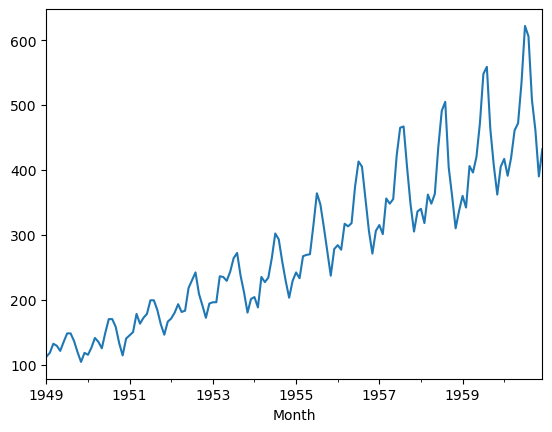

In [12]:
df['Passengers'].plot()

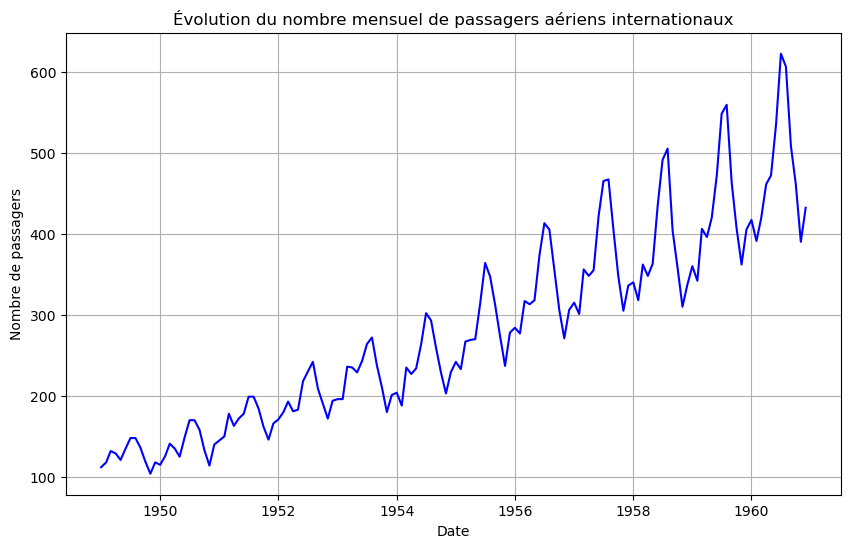

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], color='blue')
plt.title('Évolution du nombre mensuel de passagers aériens internationaux')
plt.xlabel('Date')
plt.ylabel('Nombre de passagers')
plt.grid(True)
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(df['Passengers'])

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                        |
|----------------|-------------------------------|
| Valeur de test | 0.8153688792060547            |
| P-valeur       | 0.9918802434376411            |
| Conclusion     | La série est non stationnaire |


ADF Statistic: -2.829267
p-value: 0.054213
The 'Sales' column is non-stationary.


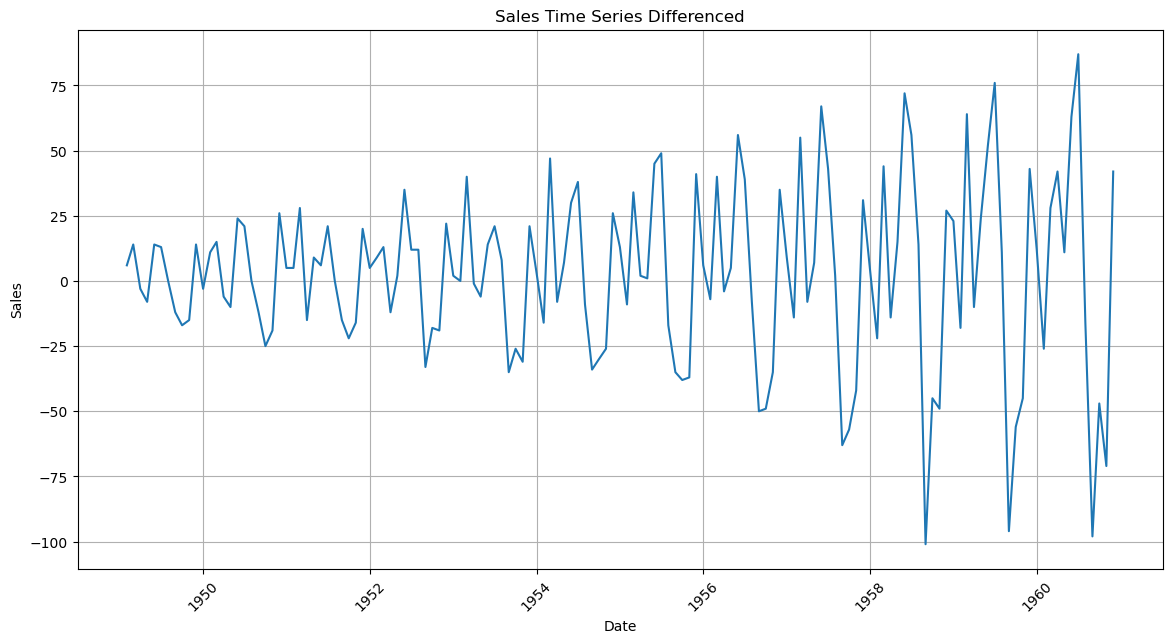

In [20]:
differenced = df['Passengers'].diff()

result = adfuller(differenced.dropna())

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The 'Sales' column is stationary.")
else:
    print("The 'Sales' column is non-stationary.")
    
plt.figure(figsize=(14,7))
plt.plot(differenced)
plt.title('Sales Time Series Differenced')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

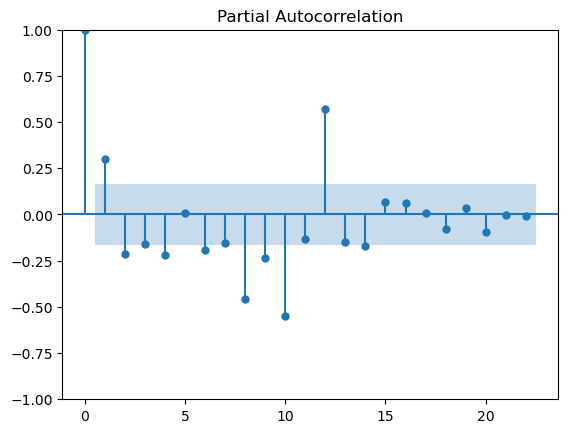

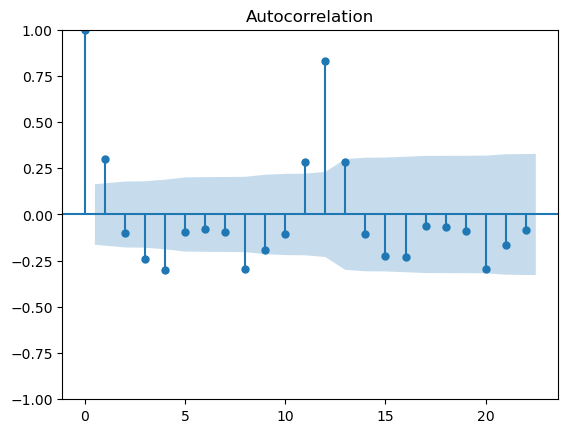

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(differenced.dropna())
plt.show()

plot_acf(differenced.dropna())
plt.show()

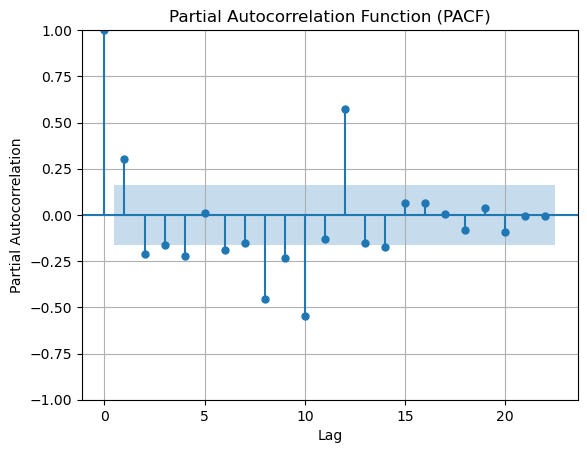

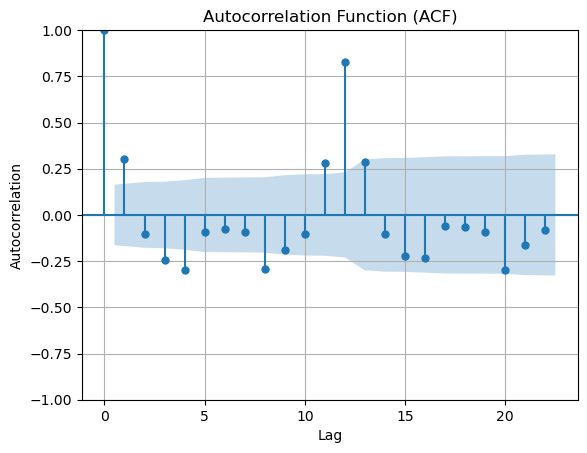

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Créer une figure et des axes pour le PACF
fig, ax = plt.subplots()
plot_pacf(differenced.dropna(), ax=ax)
ax.set_title('Partial Autocorrelation Function (PACF)')
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.grid(True) 
plt.show()

# Créer une figure et des axes pour l'ACF
fig, ax = plt.subplots()
plot_acf(differenced.dropna(), ax=ax)
ax.set_title('Autocorrelation Function (ACF)')
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.grid(True) 
plt.show()


In [25]:
p=2
d=1
q=1

In [26]:
train_size=int(0.8*len(df))
train_data=df[:train_size]
test_data=df[train_size:]

In [27]:
train_data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(2,1,1))

model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -525.324
Date:                Wed, 25 Sep 2024   AIC                           1058.648
Time:                        11:41:55   BIC                           1069.592
Sample:                    01-01-1949   HQIC                          1063.089
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0717      0.111      9.615      0.000       0.853       1.290
ar.L2         -0.4397      0.105     -4.177      0.000      -0.646      -0.233
ma.L1         -0.8309      0.110     -7.556      0.0

C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Catello\Programmes\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Figure size 1000x500 with 0 Axes>

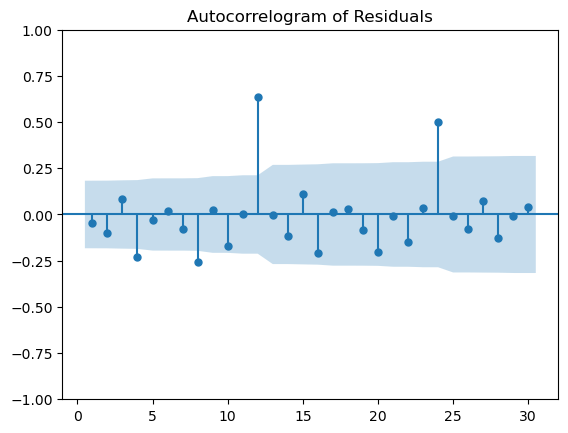

<Figure size 1000x500 with 0 Axes>

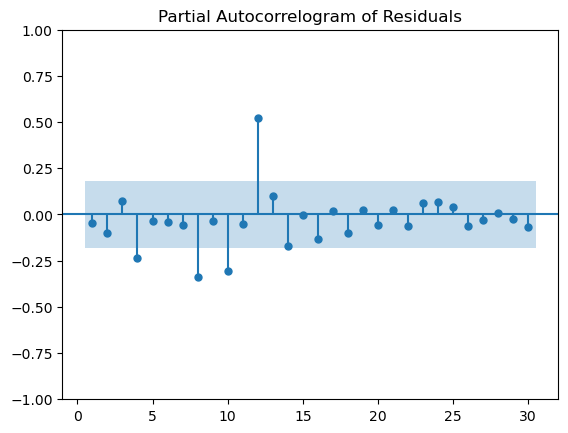

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import seaborn as sns

residuals = model_fit.resid

plt.figure(figsize=(10, 5))
plot_acf(residuals, lags=30, zero=False)
plt.title("Autocorrelogram of Residuals")
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(residuals, lags=30, zero=False)
plt.title("Partial Autocorrelogram of Residuals")
plt.show()


In [30]:
from sklearn.metrics import mean_squared_error

test_predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

predictions=model_fit.predict(start=train_size,end=len(df)-1)

In [31]:
predictions.head()

1958-08-01    485.173920
1958-09-01    454.306938
1958-10-01    423.788434
1958-11-01    404.653859
1958-12-01    397.566245
Freq: MS, Name: predicted_mean, dtype: float64

In [32]:
test_mse = mean_squared_error(test_data, test_predictions)
test_rmse = mean_squared_error(test_data, test_predictions, squared=False)

performance_df = pd.DataFrame({
    'Métrique': [ 'MSE', 'RMSE'],
    'Ensemble de test': [ test_mse, test_rmse]
})

print(performance_df)

  Métrique  Ensemble de test
0      MSE       6826.245623
1     RMSE         82.621097


In [33]:
import pmdarima as pm

model2 =  pm.AutoARIMA()

model2_fit=model2.fit(train_data)

print(model2_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(0, 1, 4)   Log Likelihood                -520.035
Date:                Wed, 25 Sep 2024   AIC                           1050.070
Time:                        11:43:20   BIC                           1063.751
Sample:                    01-01-1949   HQIC                          1055.623
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3285      0.077      4.260      0.000       0.177       0.480
ma.L2         -0.2514      0.125     -2.013      0.044      -0.496      -0.007
ma.L3         -0.1427      0.094     -1.513      0.1

In [34]:
predicted = model2.predict(n_periods=len(test_data))

predicted.head()

1958-08-01    498.516715
1958-09-01    470.586982
1958-10-01    438.544435
1958-11-01    417.758811
1958-12-01    417.758811
Freq: MS, dtype: float64

In [35]:
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)


performance_df = pd.DataFrame({
    'Métrique': [ 'MSE', 'RMSE', ],
    'Ensemble de test': [ test_mse, test_rmse]
})

print(performance_df)


  Métrique  Ensemble de test
0      MSE       6597.552911
1     RMSE         81.225322
